In [2]:
# import the necessary packages
#from skimage.measure import structural_similarity as ssim
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [6]:
def mse(imageA, imageB):
# the 'Mean Squared Error' between the two images is the
# sum of the squared difference between the two images;
# NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
# return the MSE, the lower the error, the more "similar"
# the two images are
    return err


In [33]:
def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    #s = ssim(imageA, imageB)
    s = measure.compare_ssim(imageA, imageB)
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    # show the images
    plt.show()


In [45]:
def evalImg():
# load the images -- the original, the original + contrast,
# and the original + photoshop
    original = cv2.imread("offer_capture.png")
    reward = cv2.imread("Template_Reward.png")
    offer = cv2.imread("Template_Offer.png")

# convert the images to grayscale
    original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    reward = cv2.cvtColor(reward, cv2.COLOR_BGR2GRAY)
    offer = cv2.cvtColor(offer, cv2.COLOR_BGR2GRAY)
# initialize the figure
    fig = plt.figure("Images")
    images = ("Original", original), ("Reward", reward), ("Offer", offer)
    # loop over the images
    for (i, (name, image)) in enumerate(images):
        # show the image
        ax = fig.add_subplot(1, 3, i + 1)
        ax.set_title(name)
        plt.imshow(image, cmap = plt.cm.gray)
        plt.axis("off")
    # show the figure
    plt.show()
    # compare the images
    compare_images(original, original, "Original vs. Original")
    compare_images(original, reward, "Original vs. Reward")
    compare_images(original, offer, "Original vs. Offer")

In [70]:
#check image shape
print(cv2.imread("DOTemplatexx.png").shape)
original = cv2.imread("offer_capture.png")
reward = cv2.imread("Template_Reward.png")
offer = cv2.imread("Template_Offer.png")
print("original shape:" ,original.shape)
print("reward shape:" ,reward.shape)
print("offer shape:" ,offer.shape)

(806, 727, 3)
original shape: (500, 500, 3)
reward shape: (500, 500, 3)
offer shape: (500, 500, 3)


In [65]:
src = cv2.imread('DOTemplatex.png', cv2.IMREAD_UNCHANGED)

#percent by which the image is resized
scale_percent = 50

#calculate the 50 percent of original dimensions
width = int(src.shape[1] * scale_percent / 100)
height = int(src.shape[0] * scale_percent / 100)

# dsize
dsize = (500, 500)

# resize image
output = cv2.resize(src, dsize)

cv2.imwrite('DOTemplatex.png',output) 

True

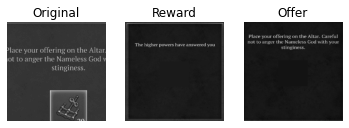

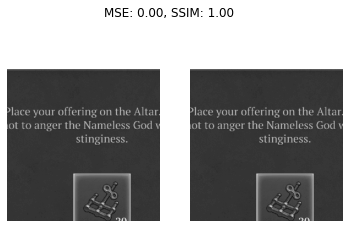

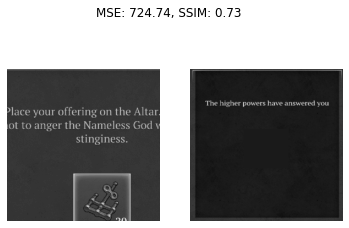

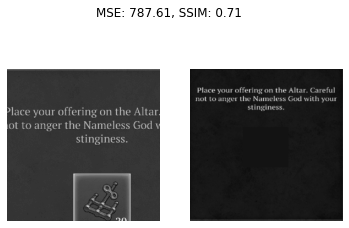

In [71]:
evalImg()